# **BFS AND DFS**

In [ ]:
# BFS

from collections import deque

def bfs(graph,start):
  visited = set()
  queue = deque([start])
  visited.add(start)

  while queue:
    node = queue.popleft()
    print(node , end=" ")

    for neighbor in graph[node]:
      if neighbor not in visited:
        queue.append(neighbor)
        visited.add(neighbor)

graph = {
    0: [1, 2],
    1: [2],
    2: [0, 3],
    3: []
}

bfs(graph, 0)

0 1 2 3 

In [ ]:
# Define the depth-first search function with parameters for visited nodes,
# graph structure, and starting node

def dfs(visited, graph, node):
    # Print the current node, ensuring no newline is added after printing
    print(node, end=" ")
    # Add the current node to the set of visited nodes
    visited.add(node)

    # Iterate through neighbors of the current node
    for neighbor in graph[node]:
        # Check if the neighbor has not been visited yet
        if neighbor not in visited:
            # Recursively call dfs function for the unvisited neighbor
            dfs(visited, graph, neighbor)

# Graph representation using a dictionary
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Set to keep track of visited nodes
visited = set()

# Start the depth-first search from node 'B'
dfs(visited, graph, 'B')


B D E F 

# **TASK 2**

     Range  BFS Time  DFS Time
0     1000  0.003824  0.003617
1    40000  0.005780  0.001899
2    80000  0.002483  0.002725
3   200000  0.002246  0.003000
4  1000000  0.000897  0.002925


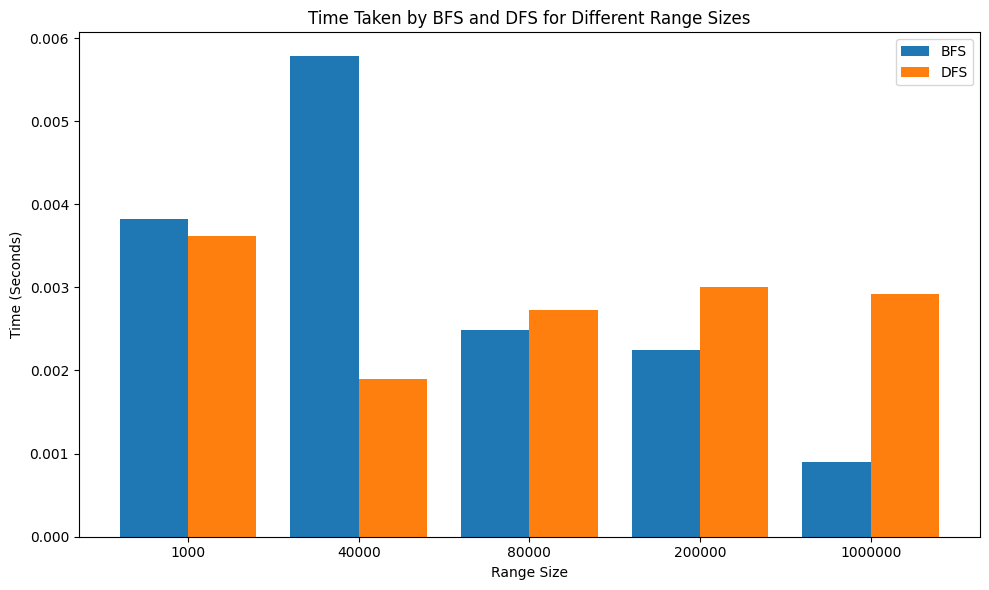

In [ ]:
import random
import time
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate random unique numbers within a specified range
def generate_unique_numbers(range_size, total_numbers):
    numbers = set()
    while len(numbers) < total_numbers:
        numbers.add(random.randint(1, range_size))
    return list(numbers)

# Function to build a binary tree from a list of numbers
def build_tree(lst):
    tree = {}
    for num in lst:
        if not tree:  # If the tree is empty, create the root node
            tree[num] = {'left': None, 'right': None}
        else:
            current = tree
            while True:
                if num < list(current.keys())[0]:  # If the number is smaller, traverse left
                    if current[list(current.keys())[0]]['left'] is None:
                        current[list(current.keys())[0]]['left'] = {num: {'left': None, 'right': None}}
                        break
                    else:
                        current = current[list(current.keys())[0]]['left']
                else:  # If the number is larger, traverse right
                    if current[list(current.keys())[0]]['right'] is None:
                        current[list(current.keys())[0]]['right'] = {num: {'left': None, 'right': None}}
                        break
                    else:
                        current = current[list(current.keys())[0]]['right']
    return tree

# Breadth First Search algorithm to find a goal value in a binary tree
def bfs(tree, goal):
    start_time = time.time()
    queue = deque([(tree, [])])  # Initialize a queue with the root node and an empty path
    while queue:
        node, path = queue.popleft()  # Pop the leftmost node from the queue
        if list(node.keys())[0] == goal:  # If the goal is found, return the time taken
            end_time = time.time()
            return end_time - start_time
        if node[list(node.keys())[0]]['left']:  # If the left child exists, append it to the queue
            queue.append((node[list(node.keys())[0]]['left'], path + [list(node.keys())[0]]))
        if node[list(node.keys())[0]]['right']:  # If the right child exists, append it to the queue
            queue.append((node[list(node.keys())[0]]['right'], path + [list(node.keys())[0]]))
    return None

# Depth First Search algorithm to find a goal value in a binary tree
def dfs(tree, goal):
    start_time = time.time()
    stack = [(tree, [])]  # Initialize a stack with the root node and an empty path
    while stack:
        node, path = stack.pop()  # Pop the top node from the stack
        if list(node.keys())[0] == goal:  # If the goal is found, return the time taken
            end_time = time.time()
            return end_time - start_time
        if node[list(node.keys())[0]]['right']:  # If the right child exists, append it to the stack
            stack.append((node[list(node.keys())[0]]['right'], path + [list(node.keys())[0]]))
        if node[list(node.keys())[0]]['left']:  # If the left child exists, append it to the stack
            stack.append((node[list(node.keys())[0]]['left'], path + [list(node.keys())[0]]))
    return None

# Generate random unique numbers for each specified range
ranges = [1000, 40000, 80000, 200000, 1000000]
results = []

for range_size in ranges:
    lst = generate_unique_numbers(range_size, 1000)  # Generate a list of unique numbers
    tree = build_tree(lst)  # Build a binary tree from the list
    goal = lst[-220]  # Set the goal value to be searched for
    bfs_time = bfs(tree, goal)  # Perform BFS and record the time taken
    dfs_time = dfs(tree, goal)  # Perform DFS and record the time taken
    results.append([range_size, bfs_time, dfs_time])  # Append results for this range

# Create a dataframe to store the results
df = pd.DataFrame(results, columns=['Range', 'BFS Time', 'DFS Time'])
print(df)  # Print the dataframe containing the results

# Plotting
plt.figure(figsize=(10, 6))

# Extracting data for plotting
range_sizes = df['Range']
bfs_times = df['BFS Time']
dfs_times = df['DFS Time']

# Plotting BFS time
plt.bar(range(len(range_sizes)), bfs_times, width=0.4, align='center', label='BFS')

# Plotting DFS time
plt.bar([i + 0.4 for i in range(len(range_sizes))], dfs_times, width=0.4, align='center', label='DFS')

# X-axis
plt.xticks([i + 0.2 for i in range(len(range_sizes))], range_sizes)
plt.xlabel('Range Size')

# Y-axis
plt.ylabel('Time (Seconds)')

# Title and legend
plt.title('Time Taken by BFS and DFS for Different Range Sizes')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


# **TASK 3**

In [ ]:
# A* search algorithm

# Node class to represent a node in the search space
class Node:
    def __init__(self, parent, position, g, h):
        self.parent = parent  # Parent node
        self.position = position  # Position of the node in the maze
        self.g = g  # Cost from start to current node
        self.h = h  # Heuristic estimate of the cost from current node to goal
        self.f = g + h  # Total cost

# A* search function
def a_star_search(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    open_set = []  # List of nodes to be evaluated
    closed_set = set()  # Set of visited nodes
    start_node = Node(None, start, 0, manhattan_distance(start, end))  # Create the start node
    open_set.append(start_node)  # Add the start node to the list of nodes to be evaluated

    # Loop until all nodes have been evaluated
    while open_set:
        current_node = min(open_set, key=lambda x: x.f)  # Get the node with the lowest total cost
        open_set.remove(current_node)  # Remove the current node from the list of nodes to be evaluated
        closed_set.add(current_node.position)  # Add the current node to the set of visited nodes

        # If the current node is the goal node, reconstruct and return the path
        if current_node.position == end:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]  # Return the path in reversed order

        # Generate neighbors of the current node
        for i, j in ((-1, 0), (1, 0), (0, -1), (0, 1)):
            neighbor_position = (current_node.position[0] + i, current_node.position[1] + j)
            # Check if the neighbor is within the maze boundaries and is not an obstacle
            if 0 <= neighbor_position[0] < rows and 0 <= neighbor_position[1] < cols and maze[neighbor_position[0]][neighbor_position[1]] != '#':
                # If the neighbor has already been visited, skip it
                if neighbor_position in closed_set:
                    continue
                tentative_g = current_node.g + 1  # Calculate the tentative cost from start to neighbor

                # Create a new node for the neighbor
                new_node = Node(current_node, neighbor_position, tentative_g, manhattan_distance(neighbor_position, end))
                open_set_member = any(node.position == neighbor_position for node in open_set)  # Check if the neighbor is in the list of nodes to be evaluated
                # If the neighbor is not in the list of nodes to be evaluated or the tentative cost is lower than its current cost, update the neighbor's cost and add it to the list of nodes to be evaluated
                if not open_set_member or tentative_g < new_node.g:
                    new_node.g = tentative_g
                    open_set.append(new_node)

    return None  # Return None if no path is found

# Function to calculate the Manhattan distance between two points
def manhattan_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return abs(x1 - x2) + abs(y1 - y2)

# Example usage
maze = [
    ['.', '.', '.', '.', '.', '.', '.'],
    ['.', '#', '.', '.', '.', '#', '.'],
    ['.', '.', '.', '.', '.', '.', '.'],
    ['.', '#', '#', '#', '.', '.', '.'],
    ['.', '.', '.', '.', '.', '#', '.'],
    ['.', '.', '.', '.', '.', '.', 'Y'],
]

start = (0, 0)  # Position of the starting node
end = (5, 6)  # Position of the ending node

path = a_star_search(maze, start, end)

if path:
    print("Path found:", path)
else:
    print("No path found")


Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6)]


# **TASK 4**

In [5]:
class Node:
    def __init__(self, value=None):
        self.value = value  # Initialize the value of the node
        self.children = []  # Initialize an empty list to store children nodes

    def add_child(self, child):
        self.children.append(child)  # Add a child node to the list of children nodes

def minimax(node, depth, alpha, beta, maximizing_player):
    if depth == 0 or not node.children:
        # If we have reached the maximum depth or the node has no children, return the value of the node
        return node.value

    if maximizing_player:
        max_eval = float('-inf')  # Initialize the maximum evaluation to negative infinity
        for child in node.children:
            eval = minimax(child, depth - 1, alpha, beta, False)  # Recursively call minimax for each child node
            max_eval = max(max_eval, eval)  # Update max_eval with the maximum of its current value and the evaluation of the child node
            alpha = max(alpha, eval)  # Update alpha with the maximum of its current value and the evaluation of the child node
            if beta <= alpha:
                # If beta is less than or equal to alpha, prune the subtree
                break
        return max_eval
    else:
        min_eval = float('inf')  # Initialize the minimum evaluation to positive infinity
        for child in node.children:
            eval = minimax(child, depth - 1, alpha, beta, True)  # Recursively call minimax for each child node
            min_eval = min(min_eval, eval)  # Update min_eval with the minimum of its current value and the evaluation of the child node
            beta = min(beta, eval)  # Update beta with the minimum of its current value and the evaluation of the child node
            if beta <= alpha:
                # If beta is less than or equal to alpha, prune the subtree
                break
        return min_eval

# Example usage
root = Node()  # Create the root node
root.value = 0  # Set the value of the root node
a = Node(3)  # Create a child node with value 3
b = Node(5)  # Create a child node with value 5
c = Node(6)  # Create a child node with value 6
d = Node(9)  # Create a child node with value 9
e = Node(1)  # Create a child node with value 1
f = Node(2)  # Create a child node with value 2
root.add_child(a)  # Add node a as a child of the root node
root.add_child(b)  # Add node b as a child of the root node
root.add_child(c)  # Add node c as a child of the root node
a.add_child(d)  # Add node d as a child of node a
a.add_child(e)  # Add node e as a child of node a
b.add_child(f)  # Add node f as a child of node b

print("Result:", minimax(root, 3, float('-inf'), float('inf'), True))  # Call the minimax function with the root node and print the result


Result: 6
